The Computer Vision Project: Gesture recognition.

https://towardsdatascience.com/sign-language-recognition-in-pytorch-5d72688f98b7 

https://www.youtube.com/watch?v=UxWhqI8BvCA



In [0]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import random

import numpy as np
import pandas as pd

from time import time

import seaborn as sns
from google.colab import files


In [0]:
class Dataset(object):
    """An abstract class representing a Dataset.
    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

In [0]:
class DatasetMNIST(Dataset):
    
    def __init__(self, file_path, transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        image = self.data.iloc[index, 1:].values.astype(np.uint8).reshape((1, 28, 28))
        label = self.data.iloc[index, 0]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

Do rotation and noise injection

Changed to MyDrive to reduce the upload time



In [4]:
from google.colab import drive
drive.mount('/content/drive')

# train_data_raw = pd.read_csv('/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_train.csv', sep=",")
# val_data_raw = pd.read_csv('/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_test.csv', sep=",")


# train_data_raw = datasets.DatasetFolder(root='/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_train.csv', transform=transforms.ToTensor())
# val_data_raw = datasets.DatasetFolder(root='/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_test.csv', transform=transforms.ToTensor())

train_data_raw = DatasetMNIST('/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_train.csv', transform=transforms.ToTensor())
val_data_raw = DatasetMNIST('/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_test.csv', transform=transforms.ToTensor())

# mnist_trainset = torch.tensor(train_data_raw.values)
# mnist_validset = torch.tensor(val_data_raw.values)

print("-----")
print(len(train_data_raw))
print("-----")
print(len(val_data_raw))
batch_size = 64

train_data_loader = torch.utils.data.DataLoader(train_data_raw, batch_size=batch_size, shuffle=True)
valid_data_loader = torch.utils.data.DataLoader(val_data_raw, batch_size=batch_size, shuffle=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
-----
27455
-----
7172


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# train_data_raw = pd.read_csv('/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_train.csv', sep=",")
# val_data_raw = pd.read_csv('/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_test.csv', sep=",")

# mnist_testset = datasets.MNIST(root='/content/drive/My Drive/Computer Vision Project/ComVisdataset/sign_mnist_test.csv', train=False, download=True, transform=transforms.ToTensor())

# # mnist_trainset = torch.tensor(train_data_raw.values)
# # mnist_validset = torch.tensor(val_data_raw.values)

# print("-----")
# print(len(train_data_raw))
# print("-----")
# print(len(val_data_raw))
# batch_size = 32

# train_data_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
# valid_data_loader = torch.utils.data.DataLoader(mnist_validset, batch_size=batch_size, shuffle=True)

data_raw = pd.read_csv('../input/sign_mnist_train.csv', sep=",")
test_data_raw = pd.read_csv('../input/sign_mnist_test.csv', sep=",")

rottransform = transforms.Compose([transforms.RandomRotation(40), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

rot_mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=rottransform )

In [0]:
#path for temporary storage of the model parameters
path = "./best_parameter.pt"

In [0]:
# train_labels = train_data_raw['label']
# train_data_raw.drop('label', axis=1, inplace=True)

# val_labels = val_data_raw['label']
# val_data_raw.drop('label', axis=1, inplace=True)

In [0]:
#todo dataloader



In [0]:
# train_data = train_data_raw.values
# train_labels = train_labels.values

# val_data = val_data_raw.values
# val_labels = val_labels.values

Show example images

In [0]:
# pixels = train_data[10].reshape(28, 28)
# plt.subplot(221)
# sns.heatmap(data=pixels)

# pixels = train_data[12].reshape(28, 28)
# plt.subplot(222)
# sns.heatmap(data=pixels)

# pixels = train_data[20].reshape(28, 28)
# plt.subplot(223)
# sns.heatmap(data=pixels)

# pixels = train_data[32].reshape(28, 28)
# plt.subplot(224)
# sns.heatmap(data=pixels)

Reshaping here

In [0]:
# train_reshaped = []
# for i in train_data:
#     train_reshaped.append(i.reshape(1, 28, 28))
# train_data = np.array(train_reshaped)

# val_reshaped = []
# for i in val_data:
#     val_reshaped.append(i.reshape(1,28,28))
# val_data = np.array(val_reshaped)

In [0]:
# train_x = torch.FloatTensor(train_data)
# train_y = torch.LongTensor(train_labels.tolist())

# val_x = torch.FloatTensor(val_data)
# val_y = torch.LongTensor(val_labels.tolist())

In [0]:
class Network(nn.Module): 
    
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.pool1 = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(10, 20, 3)
        self.pool2 = nn.MaxPool2d(2)
        
        self.conv3 = nn.Conv2d(20, 30, 3) 
        self.dropout1 = nn.Dropout2d()
        
        self.fc3 = nn.Linear(30 * 3 * 3, 270) 
        self.fc4 = nn.Linear(270, 26)
        
        self.softmax = nn.LogSoftmax(dim=1)
    
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.dropout1(x)
                
        x = x.view(-1, 30 * 3 * 3) 
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        return self.softmax(x)
    
    def test(self, predictions, labels):
        
        self.eval()
        correct = 0
        for p, l in zip(predictions, labels):
            if p == l:
                correct += 1
        
        acc = correct / len(predictions)
        print("Correct predictions: %5d / %5d (%5f)" % (correct, len(predictions), acc))
        
    def evaluate(self, predictions, labels):
                
        correct = 0
        for p, l in zip(predictions, labels):
            if p == l:
                correct += 1
        
        acc = correct / len(predictions)
        return(acc)

In [13]:
!pip install torchsummary
from torchsummary import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
model = Network().to(device)
# model = TESTING().to(device)

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
         MaxPool2d-2           [-1, 10, 13, 13]               0
            Conv2d-3           [-1, 20, 11, 11]           1,820
         MaxPool2d-4             [-1, 20, 5, 5]               0
            Conv2d-5             [-1, 30, 3, 3]           5,430
         Dropout2d-6             [-1, 30, 3, 3]               0
            Linear-7                  [-1, 270]          73,170
            Linear-8                   [-1, 26]           7,046
        LogSoftmax-9                   [-1, 26]               0
Total params: 87,566
Trainable params: 87,566
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.09
Params size (MB): 0.33
Estimated Total Size (MB): 0.43
---------------------------------------------

Use device for speed!!!!

In [0]:
net = Network().to(device)
# net = TESTING(BasicBlock, [3, 3, 3], 24)
# net = TESTING().to(device)

optimizer = optim.SGD(net.parameters(),0.001, momentum=0.7)
loss_func = nn.CrossEntropyLoss()

Todo work on the training!!!!

In [18]:
time0 = time()

#for early stopping
p = 1 #window size
j = 0
valid_loss_best = 20
epoch_count = 0

#array for plotting the loss
train_loss_log = []
val_log = []

while j < p:
# for e in range(20):
  epoch_count += 1
  for i, (batch_X, batch_Y) in enumerate(train_data_loader):
    
    # Select a minibatch
    X = Variable(batch_X)    # image is already size of (28x28), no reshape
    Y = Variable(batch_Y)    # label is not one-hot encoded
    X = X.to(device)
    Y = Y.to(device)
    # initialization of the gradients
    optimizer.zero_grad()
    
    # Forward propagation: compute the output
    # net_out = net(X)
    # net_out = net(X.permute(0, 2, 3, 1))
    net_out = net(X.permute(0, 2, 1, 3))

    loss = loss_func(net_out, Y)
    loss.backward()
    optimizer.step()

  # if i % 1000 == 0:
    #pred = net(Variable(test_data_formated))
    # train_loss_log.append(loss.item())
    # net_out = net(X.permute(0, 2, 3, 1))
    # net_out = net(X.permute(0, 2, 1, 3))

    val_loss = loss_func(net_out, Y)

    val_log.append(val_loss.item())

  # print('Epoch: {} - Training Loss: {:.6f}'.format(e + 1, loss.item()))
  # print('Epoch: {} - Validation Loss: {:.6f}'.format(e + 1, val_loss.item()))            
  print('Epoch: {} - Training Loss: {:.6f}'.format(epoch_count, loss.item()))
  print('Epoch: {} - Validation Loss: {:.6f}'.format(epoch_count, val_loss.item()))
    
    #early stopping---------------------
  if val_loss < valid_loss_best:
    j = 0
    
    # Save model Parameters for best validation epoch
    torch.save(model.state_dict(), path)
    print("model saved")
    valid_loss_best = val_loss
    training_loss_best = loss
    epoch_count_best = epoch_count
  else:
    j += 1


print("Best Epoch: ", epoch_count_best)
print("Best Training loss", valid_loss_best.item())
print("\nTraining and Validation Time (in minutes) =",(time()-time0)/60)

Epoch: 1 - Training Loss: 3.257434
Epoch: 1 - Validation Loss: 3.257434
model saved
Epoch: 2 - Training Loss: 3.259401
Epoch: 2 - Validation Loss: 3.259401
Best Epoch:  1
Best Training loss 3.2574336528778076

Training and Validation Time (in minutes) = 0.5527144591013591


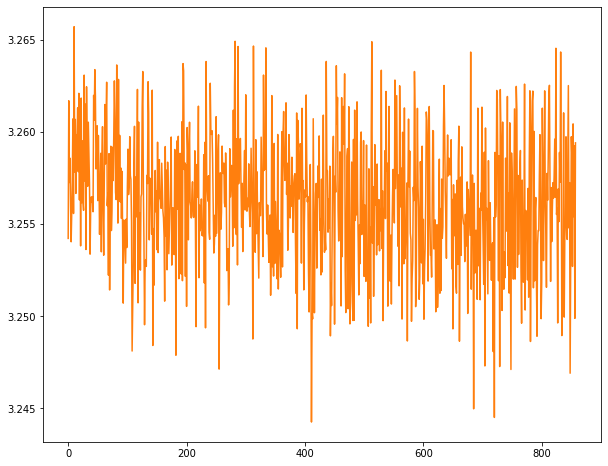

In [19]:
plt.figure(figsize=(10,8))
plt.plot(train_loss_log[2:])
plt.plot(val_log)
# plt.plot(np.ones(len(acc_log)), linestyle='dashed')
plt.show()

does not get right images

In [20]:
# predictions = net(X.permute(0, 2, 3, 1))
predictions = net(X.permute(0, 2, 1, 3))
# predictions = net(X)
net.test(torch.max(predictions.data, 1)[1], Y)

Correct predictions:     1 /    63 (0.015873)


In [0]:
torch.cuda.get_device_name(0)